<a href="https://colab.research.google.com/github/AlpaslanErdag/Autonomous-Car-2022MLIS2/blob/main/MLiS_AutonomousCar_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
!git clone https://github.com/AlpaslanErdag/cardata

fatal: destination path 'cardata' already exists and is not an empty directory.


In [62]:
!ls cardata

1.png  4.png  sampleSubmission.csv  training_norm2.csv
2.png  5.png  test_data		    training_norm3.csv
3.png  6.png  training_data	    training_norm.csv


In [63]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam # - Works
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense,Conv2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import glob
import random

In [64]:
datadir= 'cardata'
colums= ['image_id','angle','speed']
data=pd.read_csv(os.path.join(datadir,'training_norm3.csv'))
data.head()

,image_id,angle,speed
0,1.png,0.4375,0
1,2.png,0.8125,1
2,3.png,0.4375,1
3,4.png,0.6250,1
4,5.png,0.5000,0


[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ]


<BarContainer object of 15 artists>

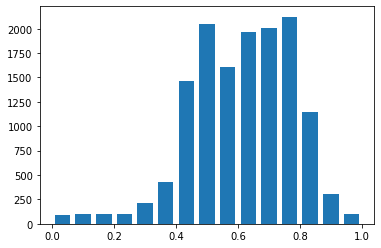

In [65]:
num_bins= 15
hist, bins=np.histogram(data['angle'],num_bins)
center= (bins[:-1]+ bins[1:])*0.5
print(bins)
plt.bar(center,hist,width=0.05)

In [66]:
print(data.iloc[3])
def load_img_steering(datadir, df):
  image_path = []
  angle = []
  for i in range(len(data)):
    indexed_data = data.iloc[i]
    image_id = indexed_data[0]
    image_path.append(os.path.join(datadir,image_id))
    angle.append(float(indexed_data[1]))
  image_paths = np.asarray(image_path)
  angles = np.asarray(angle)
  return image_paths, angles

image_id    4.png
angle       0.625
speed           1
Name: 3, dtype: object


In [67]:
image_paths, angles = load_img_steering(datadir + '/training_data/training_data', data)
image_paths

array(['cardata/training_data/training_data/1.png',
       'cardata/training_data/training_data/2.png',
       'cardata/training_data/training_data/3.png', ...,
       'cardata/training_data/training_data/13796.png',
       'cardata/training_data/training_data/13797.png',
       'cardata/training_data/training_data/13798.png'], dtype='<U45')

In [68]:
X_train,X_valid,y_train,y_valid= train_test_split(image_paths,angles,test_size=0.2,random_state=3)
print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))


Training Samples: 11034
Valid Samples: 2759


Text(0.5, 1.0, 'Validation set')

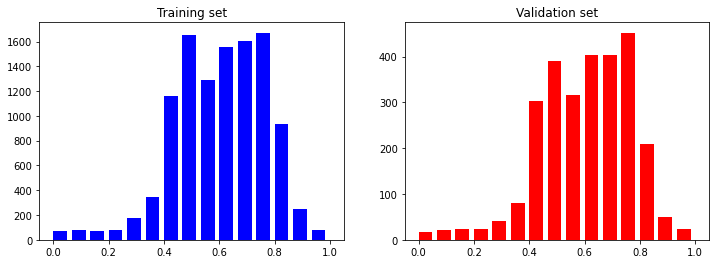

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

In [70]:
def img_preprocess(img):
    img=mpimg.imread(img)
    img= np.array(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    return img

In [71]:
import glob
    
    # loop the image folder
image_files = glob.glob(datadir+"*.csv")
for idx, file in enumerate(image_files):
		print(file)
		

In [72]:
image1 = image_paths[10]
original_mage = mpimg.imread(image_paths[10])
preprocessed_image = img_preprocess(image1)

Text(0.5, 1.0, 'Preprocessed Image')

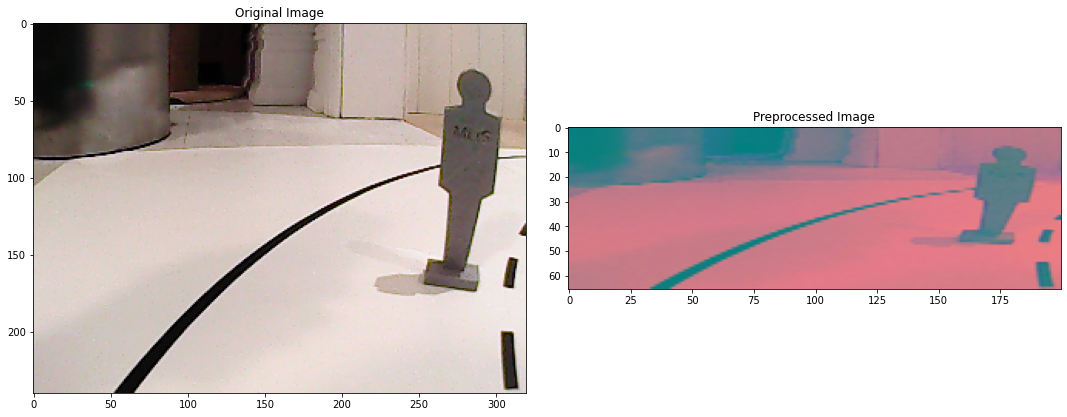

In [73]:
fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [74]:
y_train

array([0.625 , 0.6875, 0.6875, ..., 0.875 , 0.6875, 0.5   ])

In [75]:
# this line is to aplly img_preprocess function to all X_train images
X_train=np.array(list(map(img_preprocess, X_train)))

(11034, 66, 200, 3)


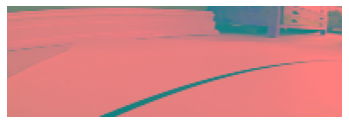

In [76]:
# to see map function works correctly
plt.imshow(X_train[random.randint(0,len(X_train)-1)])
plt.axis('off')
print(X_train.shape)

In [77]:
X_valid=np.array(list(map(img_preprocess, X_valid)))


In [78]:
def nvidia_model():
 
  model = Sequential()
 
  model.add(Conv2D(24, kernel_size=(5,5), strides=(2,2), input_shape=(66,200,3),activation='relu'))
 
  model.add(Conv2D(36, kernel_size=(5,5), strides=(2,2), activation='relu'))
  model.add(Conv2D(48, kernel_size=(5,5), strides=(2,2), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
  model.add(Dropout(0.5))
 
 
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.5))
 
 
  model.add(Dense(50, activation='relu'))
  model.add(Dense(10, activation ='relu'))
  model.add(Dense(1))
 
 
  optimizer= Adam(lr=1e-3)
  model.compile(loss='mse', optimizer=optimizer)

  return model

In [79]:
model = nvidia_model()
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_22 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_24 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 dropout_2 (Dropout)         (None, 1, 18, 64)         0         
                                                                 
 flatten_1 (Flatten)         (None, 1152)             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [55]:
history= model.fit(X_train,y_train, epochs=10, validation_data=(X_valid,y_valid),batch_size=100, verbose=1, shuffle=1)

Epoch 1/10
111/111 [==============================] - 116s 1s/step - loss: 0.0441 - val_loss: 0.0317
Epoch 2/10
111/111 [==============================] - 78s 703ms/step - loss: 0.0236 - val_loss: 0.0234
Epoch 3/10
111/111 [==============================] - 78s 703ms/step - loss: 0.0177 - val_loss: 0.0127
Epoch 4/10
111/111 [==============================] - 78s 707ms/step - loss: 0.0124 - val_loss: 0.0101
Epoch 5/10
111/111 [==============================] - 77s 692ms/step - loss: 0.0110 - val_loss: 0.0109
Epoch 6/10
111/111 [==============================] - 78s 702ms/step - loss: 0.0103 - val_loss: 0.0099
Epoch 7/10
111/111 [==============================] - 78s 700ms/step - loss: 0.0098 - val_loss: 0.0105
Epoch 8/10
111/111 [==============================] - 78s 699ms/step - loss: 0.0096 - val_loss: 0.0086
Epoch 9/10
111/111 [==============================] - 78s 700ms/step - loss: 0.0089 - val_loss: 0.0081
Epoch 10/10
111/111 [==============================] - 79s 711ms/step - los